In [1]:
include("../src/Regression/gamma_regression.jl")
include("../src/Type/method_parameter.jl")
using Plots
using CSV
using DataFrames

[-1.040318716921811, 0.683248323531431]


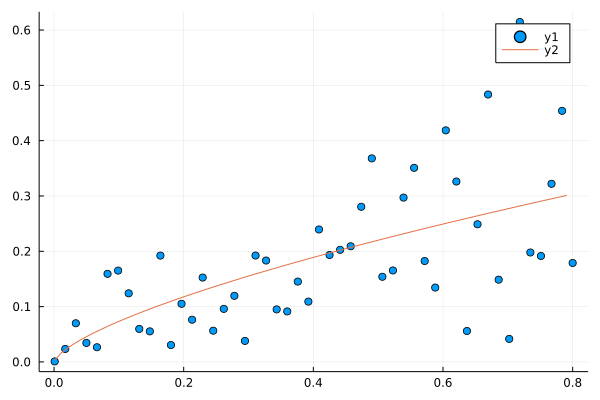

In [2]:
# μᵢ = exp(a + blogx)としたガンマ回帰
data = CSV.read("../data/kubobook_2012_csv/chap6_gamma.csv", DataFrame)
N = size(data,1)
X = ones(N,2)
for i in (1:N); X[i,2] = log(data.x[i]); end

w = gamma_regression(X, data.y, GD(zeros(2), t->0.01/sqrt(1+0.01t), 1e-4, 1000))
println(w)

scatter(data.x, data.y, fmt=:png)
xrange = (minimum(data.x):0.01:maximum(data.x))
plot!(xrange, x -> exp(w[1] + w[2] * log(x)), fmt=:png)